In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
data = pd.read_csv("hcvdat0.csv")

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [5]:
numeric_data = data.drop(columns=['Sex', 'Category'])
categorical_data = data[['Sex', 'Category']]

In [6]:
#get the type of each column 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB
None


In [7]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [8]:
#check the number of missing values
print(data.isnull().sum())

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'ALB'}>,
        <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'BIL'}>],
       [<Axes: title={'center': 'CHE'}>,
        <Axes: title={'center': 'CHOL'}>,
        <Axes: title={'center': 'CREA'}>],
       [<Axes: title={'center': 'GGT'}>,
        <Axes: title={'center': 'PROT'}>, <Axes: >]], dtype=object)

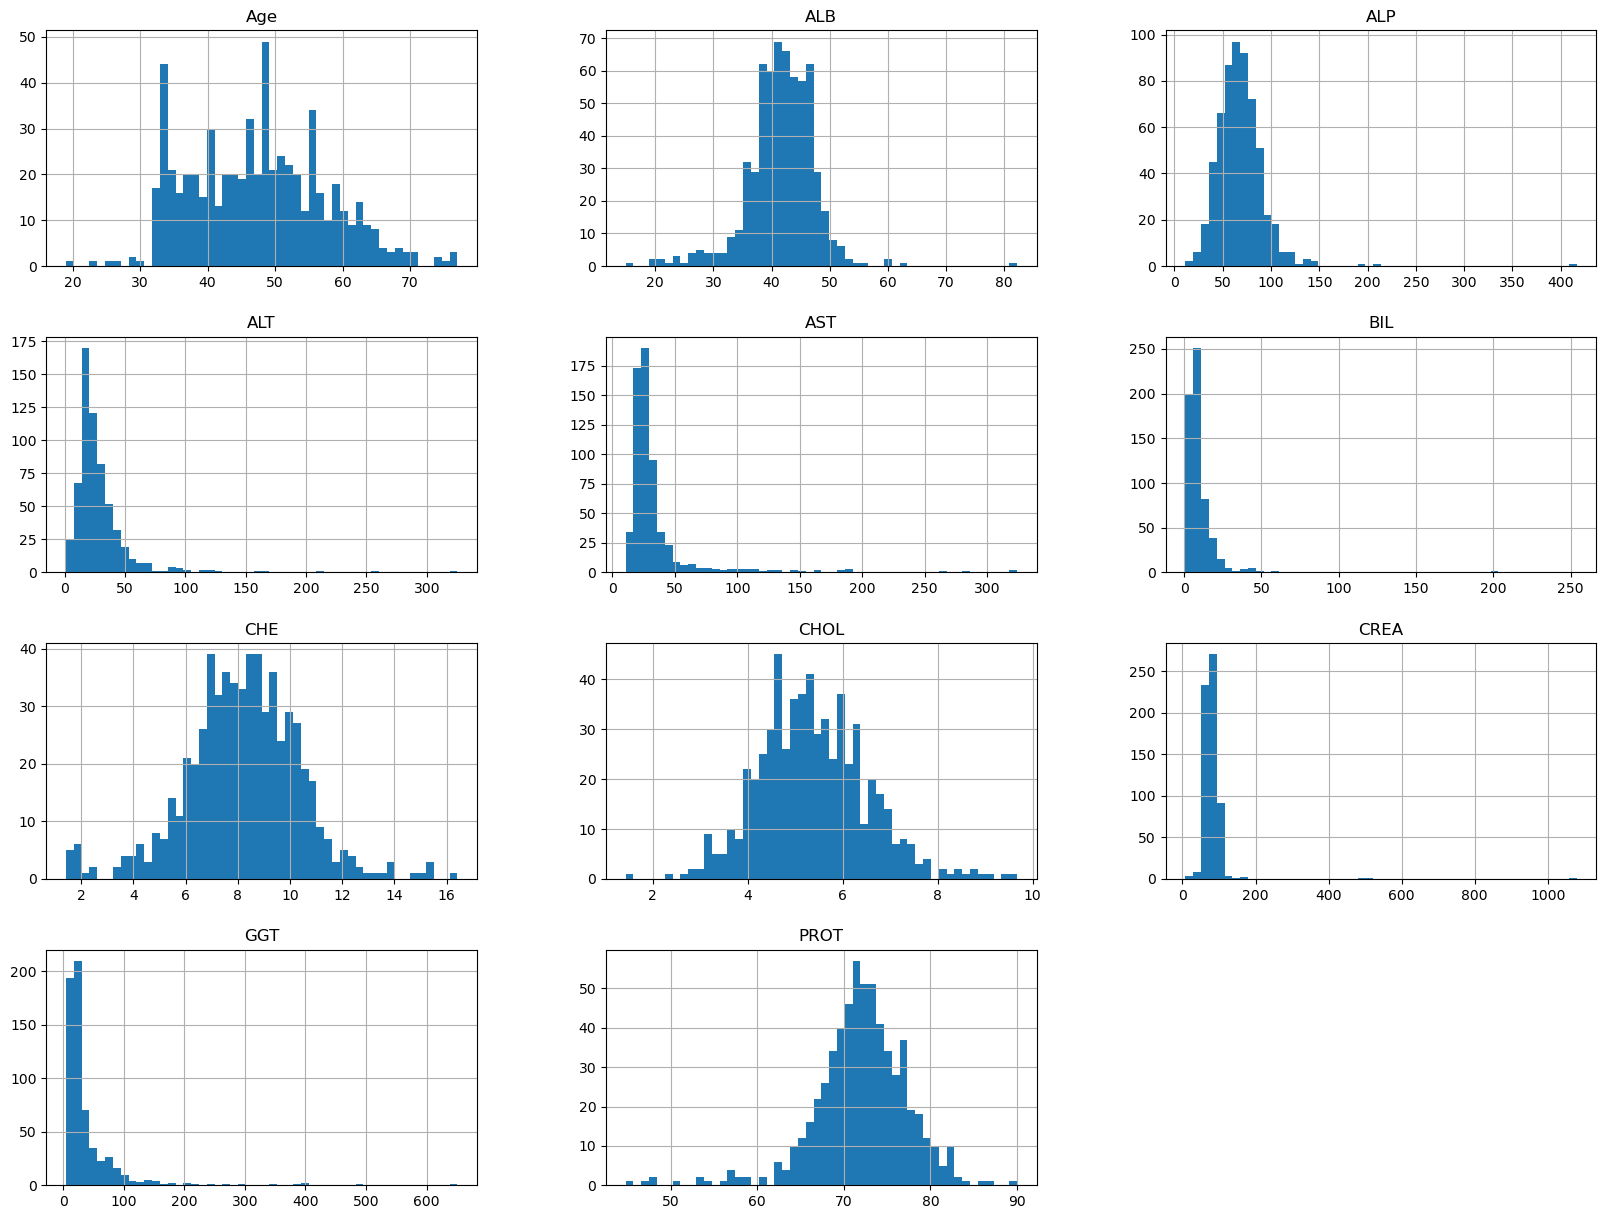

In [9]:
numeric_data.hist(bins=50, figsize=(20,15))

In [10]:
#replace the missing value by the mean of the variable
data['ALB'] = data['ALB'].fillna(data['ALB'].mean())
data['ALP'] = data['ALP'].fillna(data['ALP'].median())
data['ALT'] = data['ALT'].fillna(data['ALT'].median())
data['CHOL'] = data['CHOL'].fillna(data['CHOL'].mean())
data['PROT'] = data['PROT'].fillna(data['PROT'].mean())

In [11]:
#turn the multiclass into binary class
data['Category'] = data['Category'].apply(lambda x: 0 if x in ['0=Blood Donor', '0s=suspect Blood Donor'] else 1)

In [12]:
#turn the gender value from Male(0), Female(1)
data['Sex'] = data['Sex'].apply(lambda x: 0 if x == 'm' else 1)

In [13]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [14]:
numeric_data = data.drop(columns=['Sex', 'Category'])
categorical_data = data[['Sex', 'Category']]

# EDA

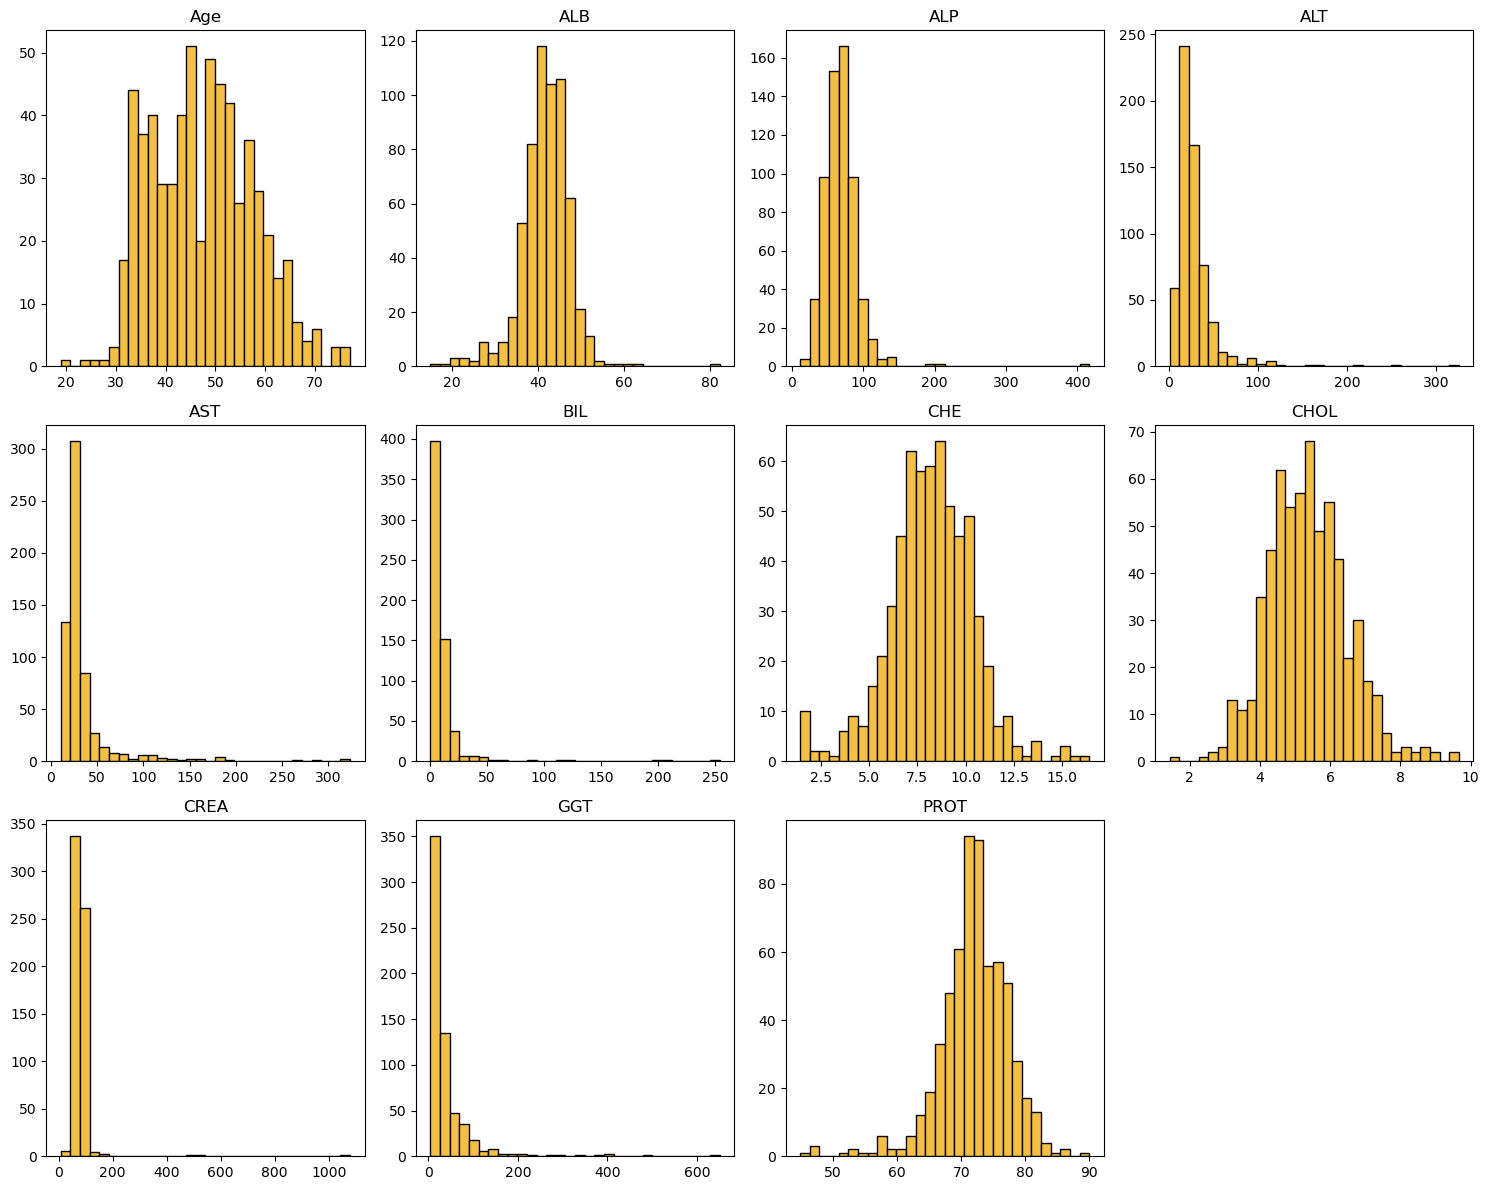

In [15]:
#histogram of numeric dataset
num_vars = len(numeric_data.columns)
num_cols = 4
num_rows = num_vars // num_cols if num_vars % num_cols == 0 else num_vars // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))
for i, col in enumerate(numeric_data.columns):
    ax = axs[i//num_cols, i%num_cols]
    ax.hist(numeric_data[col].dropna(), bins=30, color='#F5C042', edgecolor='black')
    ax.set_title(col)
if num_vars % num_cols != 0:
    for j in range(num_vars, num_rows*num_cols):
        fig.delaxes(axs[j//num_cols, j%num_cols])
plt.tight_layout()
plt.show()

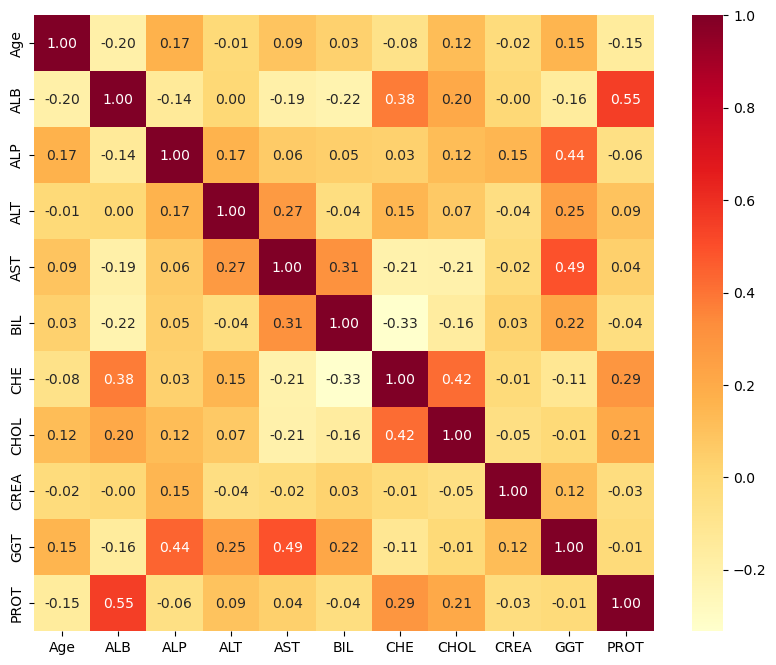

In [16]:
#draw the correlation of the numeric data 
corr = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlOrRd', cbar=True)
plt.show()

In [17]:
category_counts = data['Category'].value_counts()

In [18]:
category_counts

0    540
1     75
Name: Category, dtype: int64

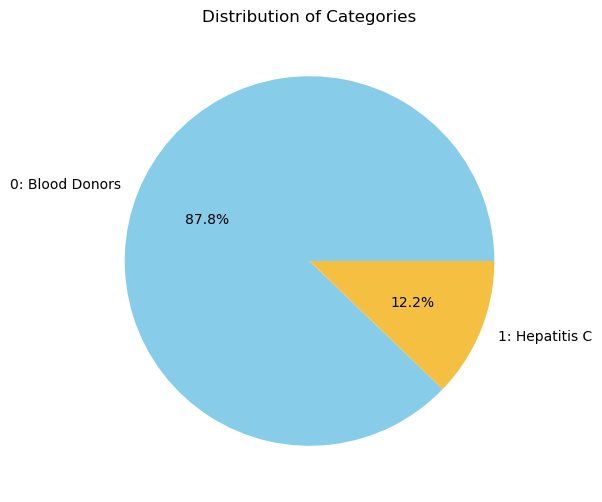

In [19]:
#create pie chart for categories
labels = ['0: Blood Donors' if idx == 0 else '1: Hepatitis C' for idx in category_counts.index]
colors = ['#87CDE9', '#F5C042'] 
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Categories')
plt.show()

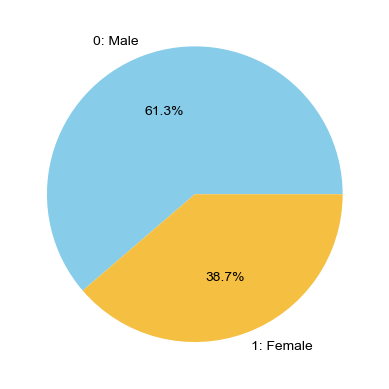

In [20]:
rcParams['font.family'] = 'Arial'
sex_count = data['Sex'].value_counts()
labels = ['0: Male' if idx == 0 else '1: Female' for idx in sex_count.index]
colors = ['#87CDE9', '#F5C042'] 

# Generate the pie chart
plt.pie(sex_count, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()

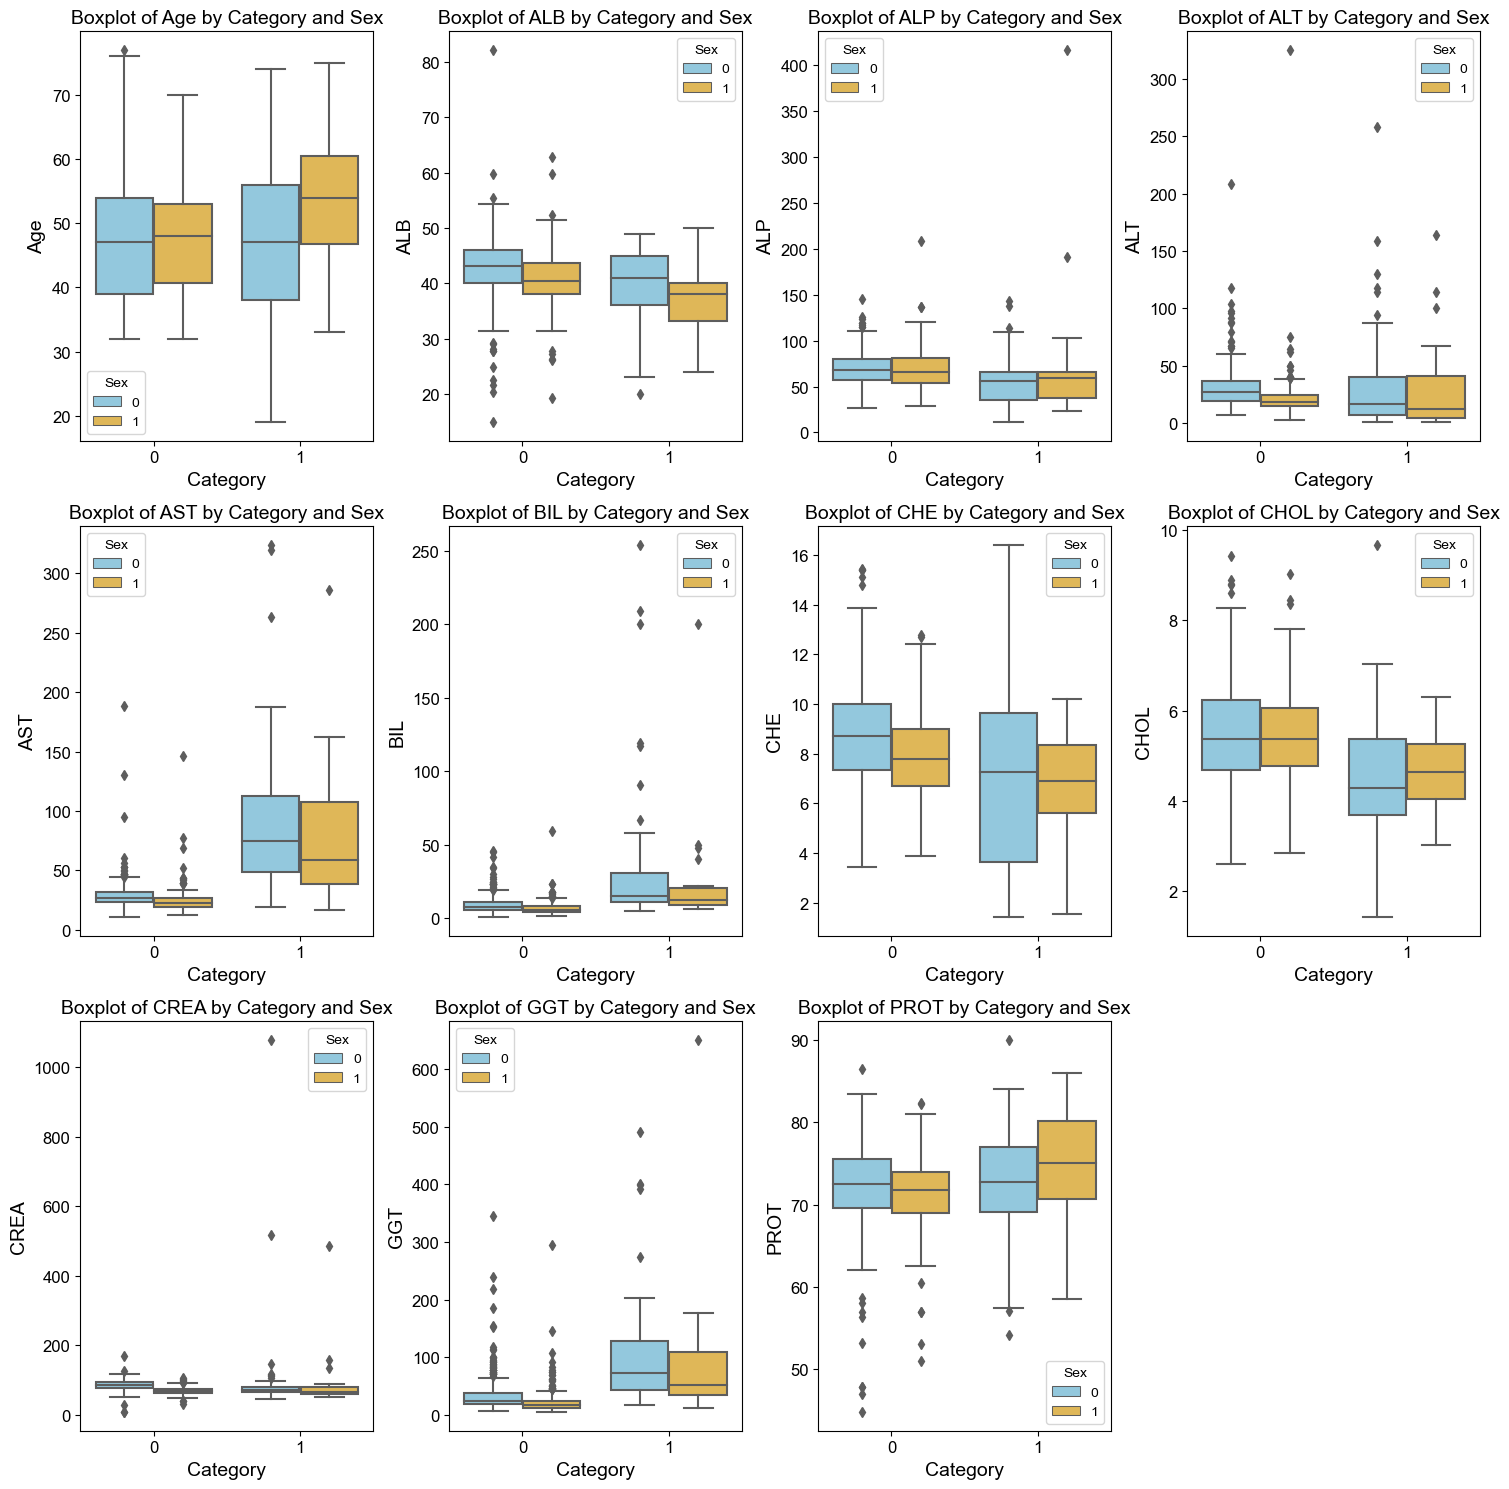

In [21]:
numeric_cols = numeric_data.columns
n_cols = 4
n_rows = len(numeric_cols) // n_cols + (len(numeric_cols) % n_cols > 0)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))

for i, col in enumerate(numeric_data.columns):
    ax = axs[i//num_cols, i%num_cols]
    sns.boxplot(x='Category', y=col, hue='Sex', data=data, ax=ax, palette=colors)
    ax.set_title(f'Boxplot of {col} by Category and Sex', fontsize=14)
    ax.xaxis.label.set_size(14)  
    ax.yaxis.label.set_size(14) 
    ax.tick_params(labelsize=12)

if num_vars % num_cols != 0:
    for j in range(num_vars, num_rows*num_cols):
        fig.delaxes(axs[j//num_cols, j%num_cols])

plt.tight_layout()
plt.show()

## Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

X = data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

# Perform Min-Max normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a pandas DataFrame
normalized_data = pd.DataFrame(X_normalized, columns=X.columns)
normalized_data['Category']=data['Category']
normalized_data['Sex']=data['Sex']

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ALB'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'BIL'}>, <Axes: title={'center': 'CHE'}>],
       [<Axes: title={'center': 'CHOL'}>,
        <Axes: title={'center': 'CREA'}>,
        <Axes: title={'center': 'GGT'}>,
        <Axes: title={'center': 'PROT'}>],
       [<Axes: title={'center': 'Category'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

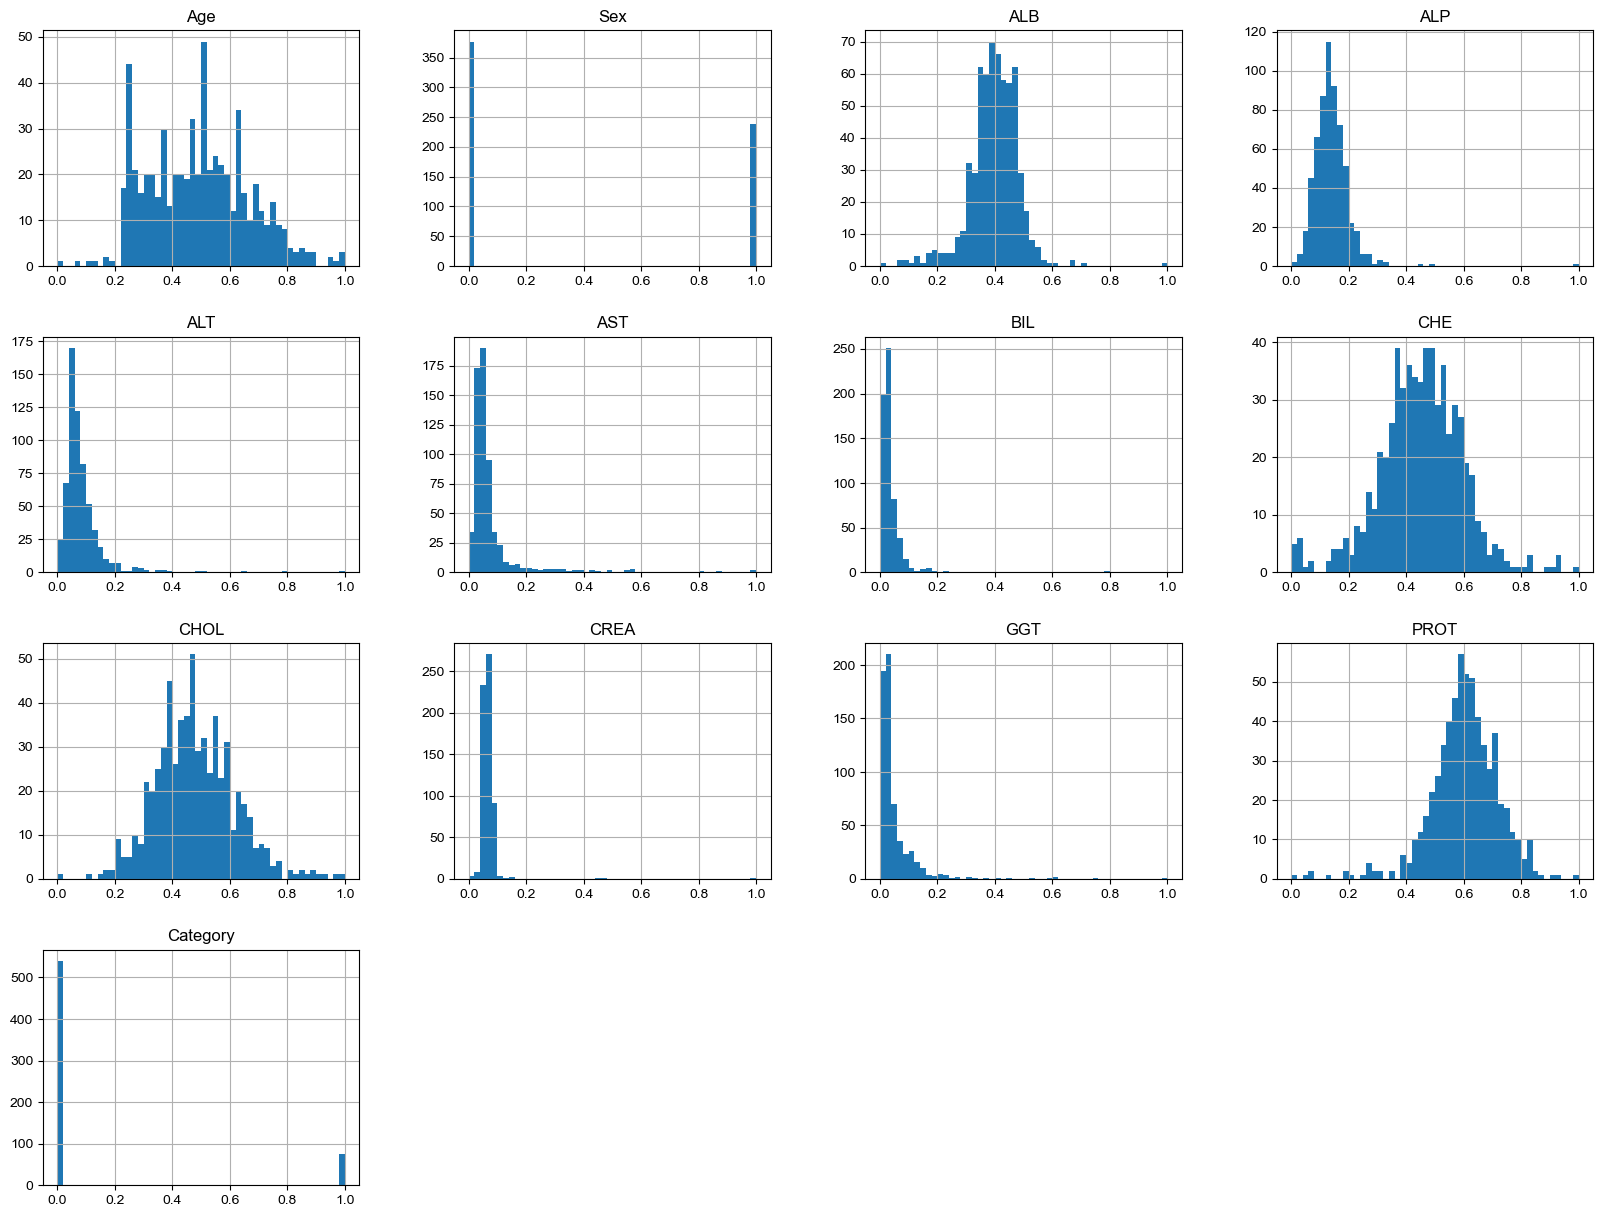

In [23]:
numeric_data = normalized_data
numeric_data.hist(bins=50, figsize=(20,15))

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
X = normalized_data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
y = normalized_data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap':[True,False]
}

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params)


In [27]:
best_rf.fit(X_train,y_train)
# evaluate the model
y_pred = best_rf.predict(X_test)

print("Best Parameters: ", best_params)
print(classification_report(y_test,y_pred))


Best Parameters:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        99
           1       1.00      0.62      0.77        24

    accuracy                           0.93       123
   macro avg       0.96      0.81      0.86       123
weighted avg       0.93      0.93      0.92       123



In [28]:
importances = best_rf.feature_importances_

# To map the feature importances with the feature names
feature_importances = pd.Series(importances, index=X.columns)

# To sort the feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print(feature_importances_sorted)

AST     0.367051
ALT     0.138343
BIL     0.119591
ALP     0.114721
GGT     0.052613
PROT    0.045284
CHOL    0.042519
Age     0.033185
ALB     0.030612
CREA    0.027649
CHE     0.026344
Sex     0.002089
dtype: float64


## Logistic Regression

$$
\min_{\beta} \{\|Y-X\beta\|_2^2+\lambda \|\beta\|_1\}
$$

$$
\min_{\beta} \{\|Y-X\beta\|_2^2+\lambda \|\beta\|_2^2\}
$$

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [30]:
train = pd.concat([X_train, y_train],axis = 1)
test = pd.concat([X_test, y_test],axis = 1)

In [31]:
train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
83,0.344828,0,0.322437,0.148038,0.086313,0.048819,0.020932,0.285524,0.391990,0.064420,0.028001,0.475664,0
90,0.344828,0,0.459138,0.126326,0.061036,0.038928,0.176540,0.479653,0.406553,0.064420,0.017636,0.679204,0
228,0.586207,0,0.439822,0.123119,0.041615,0.023931,0.028436,0.368913,0.433252,0.057884,0.021349,0.601770,0
509,0.672414,1,0.169391,0.101653,0.118989,0.212508,0.019747,0.248833,0.254854,0.029876,0.041306,0.137168,0
329,0.241379,1,0.408618,0.310634,0.040999,0.007977,0.010269,0.454303,0.477925,0.037345,0.032797,0.654867,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.327586,0,0.371471,0.127313,0.218249,0.106254,0.037915,0.632422,0.677184,0.084959,0.129641,0.626106,0
106,0.379310,0,0.442793,0.156921,0.074908,0.030632,0.021722,0.595063,0.339806,0.061619,0.029703,0.603982,0
270,0.689655,0,0.369985,0.094004,0.075524,0.034461,0.094392,0.405604,0.274272,0.072822,0.021968,0.599558,0
435,0.500000,1,0.438336,0.101653,0.047781,0.040842,0.014613,0.509673,0.649272,0.061619,0.008973,0.626106,0


In [32]:
test

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
248,0.620690,0,0.196137,0.133728,0.048397,0.022017,0.007899,0.277518,0.359223,0.053216,0.033571,0.389381,0
365,0.344828,1,0.245171,0.233654,0.048397,0.020421,0.006319,0.302201,0.469660,0.056017,0.028465,0.608407,0
432,0.500000,1,0.427935,0.095732,0.050555,0.050096,0.028831,0.448966,0.479369,0.052283,0.013769,0.626106,0
610,0.741379,1,0.254086,1.000000,0.015413,0.318124,0.194313,0.276851,0.591019,0.044534,1.000000,0.524336,1
132,0.431034,0,0.306092,0.173698,0.081998,0.060306,0.022117,0.492995,0.633495,0.070021,0.030322,0.513274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.724138,0,0.460624,0.152973,0.049938,0.043714,0.015798,0.573049,0.427184,0.074690,0.029394,0.575221,0
291,0.758621,0,0.451709,0.148038,0.048397,0.043076,0.019352,0.500334,0.395631,0.068154,0.023670,0.639381,0
250,0.620690,0,0.395245,0.118924,0.044698,0.017869,0.023697,0.328886,0.459951,0.067221,0.012222,0.555310,0
11,0.241379,0,0.468053,0.140390,0.028977,0.029994,0.019352,0.396264,0.348301,0.066287,0.021968,0.526549,0


In [33]:
# Define the parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],  # type of regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear']  # Algorithm to use in the optimization problem - 'liblinear' works with 'l1'
}

# Create an instance of the logistic regression classifier
logreg_classifier = LogisticRegression()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_logreg = LogisticRegression(**best_params)

In [34]:

best_logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = best_logreg.predict(X_test)

print("Best Parameters: ", best_params)
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123



In [35]:
#### adjust threshold
# Fit the model
best_logreg.fit(X_train, y_train)

# Predict the probabilities [Prob for Class 0, Prob for Class 1]
y_pred_proba = best_logreg.predict_proba(X_test)

# Choose the second column (index 1) which is the probability for Class 1
prob_class_1 = y_pred_proba[:, 1]

# Set threshold
threshold = 0.3

# Create array of predictions: Class 1 if probability > threshold, else Class 0
y_pred = [1 if prob > threshold else 0 for prob in prob_class_1]

print("Best Parameters: ", best_params)
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.89      0.67      0.76        24

    accuracy                           0.92       123
   macro avg       0.91      0.82      0.86       123
weighted avg       0.92      0.92      0.91       123



### Over-sampling for Logistic Regression

In [36]:
from sklearn.utils import resample

data_major = train[train.Category==0]
data_minor = train[train.Category==1]

data_minor_upsampled = resample(data_minor, 
                                 replace=True, 
                                 n_samples=len(data_major),
                                 random_state=123)

train_upsampled = pd.concat([data_major, data_minor_upsampled])
X_train_us = train_upsampled[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
y_train_us = train_upsampled['Category']

In [37]:
# Define the parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],  # type of regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear']  # Algorithm to use in the optimization problem - 'liblinear' works with 'l1'
}

# Create an instance of the logistic regression classifier
logreg_classifier = LogisticRegression()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)
grid_search.fit(X_train_us, y_train_us)
best_params = grid_search.best_params_
best_logreg_us = LogisticRegression(**best_params)

In [38]:
best_logreg_us.fit(X_train_us, y_train_us)

# Evaluate the model
y_pred = best_logreg_us.predict(X_test)

print("Best Parameters: ", best_params)
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.83      0.79      0.81        24

    accuracy                           0.93       123
   macro avg       0.89      0.88      0.88       123
weighted avg       0.93      0.93      0.93       123



In [39]:
#### adjust threshold
# Fit the model
best_logreg_us.fit(X_train_us, y_train_us)

# Predict the probabilities [Prob for Class 0, Prob for Class 1]
y_pred_proba = best_logreg_us.predict_proba(X_test)

# Choose the second column (index 1) which is the probability for Class 1
prob_class_1 = y_pred_proba[:, 1]

# Set threshold
threshold = 0.3

# Create array of predictions: Class 1 if probability > threshold, else Class 0
y_pred = [1 if prob > threshold else 0 for prob in prob_class_1]

print("Best Parameters: ", best_params)
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        99
           1       0.73      0.92      0.81        24

    accuracy                           0.92       123
   macro avg       0.86      0.92      0.88       123
weighted avg       0.93      0.92      0.92       123



In [40]:
coefficients = best_logreg_us.coef_

for feature, coefficient in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coefficient}")

Age: -2.0513051723899003
Sex: 1.1921132779230492
ALB: -2.208451975936971
ALP: -33.345492998473986
ALT: -0.1383159528705501
AST: 32.332224649873204
BIL: 11.48158913615923
CHE: 2.2541843580868637
CHOL: -3.7367032550879684
CREA: 32.69523914775518
GGT: 14.591221626365352
PROT: 5.755796687902926


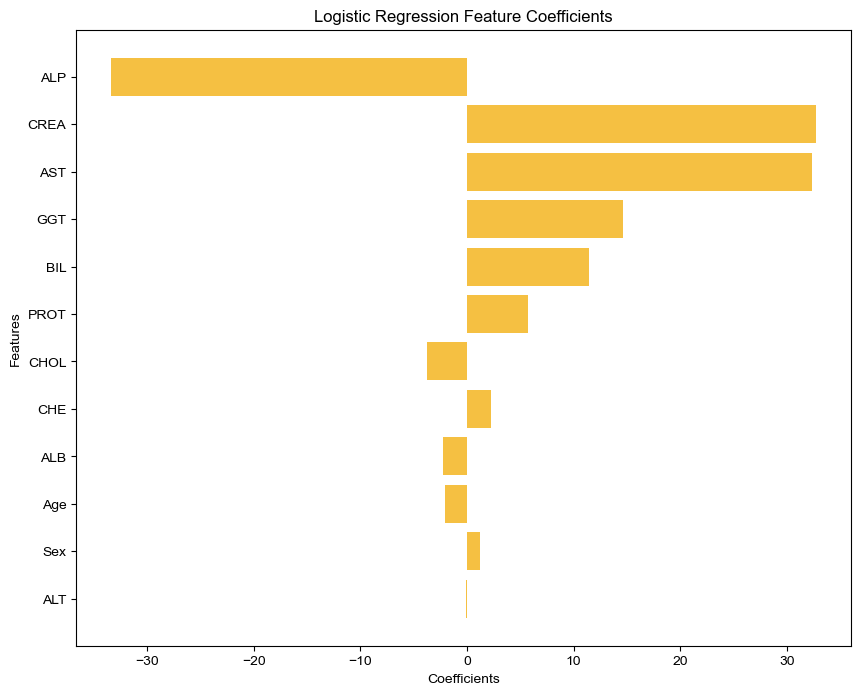

In [41]:
features = X.columns
coef = coefficients[0]

# create a DataFrame for easier manipulation
coef_df = pd.DataFrame({'features': features, 'coefficients': coef})

# sort the values by the absolute values of coefficients
coef_df = coef_df.reindex(coef_df.coefficients.abs().sort_values(ascending=True).index)

plt.figure(figsize=(10, 8))

# horizontal barplot
plt.barh(coef_df['features'], coef_df['coefficients'], color='#F5C042')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Coefficients')
plt.show()

## Support Vector Machine

In [42]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Create a SVM Classifier
svm_classifier = svm.SVC()

# Create parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], # Kernel coefficient
    'kernel': ['linear', 'rbf'] # kernel type
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_

# Create an instance of the SVC classifier with the best parameters
best_svm = svm.SVC(**best_params)

In [43]:
# Fit the model with the best parameters
best_svm.fit(X_train, y_train)

# Make predictions
y_pred = best_svm.predict(X_test)

# Print best parameters
print("Best Parameters: ", best_params)

# Print classification report
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 100, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.87      0.54      0.67        24

    accuracy                           0.89       123
   macro avg       0.88      0.76      0.80       123
weighted avg       0.89      0.89      0.88       123



### Over-sampling for SVM

In [44]:
# Create a SVM Classifier
svm_classifier = svm.SVC()

# Create parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], # Kernel coefficient
    'kernel': ['linear', 'rbf'] # kernel type
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the model
grid_search.fit(X_train_us, y_train_us)
# Get the best parameters
best_params = grid_search.best_params_

# Create an instance of the SVC classifier with the best parameters
best_svm_us = svm.SVC(**best_params)

In [45]:
# Fit the model with the best parameters
best_svm_us.fit(X_train_us, y_train_us)

# Make predictions
y_pred = best_svm_us.predict(X_test)

# Print best parameters
print("Best Parameters: ", best_params)

# Print classification report
print(classification_report(y_test, y_pred))

Best Parameters:  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.95      0.75      0.84        24

    accuracy                           0.94       123
   macro avg       0.94      0.87      0.90       123
weighted avg       0.94      0.94      0.94       123

